In [119]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [120]:
#importing or loading the dataset
pd.set_option('display.max_columns', 40)
df = pd.read_csv('insurance.csv')
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    25-01-2015  Single Vehicle Collision   Side Collision      Major Damage   
1    21-01-2015             Vehicle Theft                ?      Minor Damage   
2    22-02-2015   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    10-01-2015  Single Vehicle Collision  Front Collision      Major Damage   
4    17-02-2015             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

Business case:
    
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [121]:
#Checking of column names
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [122]:
#Checking for data shape
df.shape

(1000, 40)

In [123]:
#Checking data types
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [124]:
#Checking any null values
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [125]:
# _c39 Lets drop that last column, having all null values
df = df.drop('_c39', axis=1)

In [126]:
#Checking any blank or white spaces
np.where(df.applymap(lambda x: x == ' '))

(array([], dtype=int64), array([], dtype=int64))

In [127]:
#Checking if all entries of a column is unique or not
for i in df.columns:
    print('For column of {} :'.format(i),(len(df[i].unique())==len(df[i])))

For column of months_as_customer : False
For column of age : False
For column of policy_number : True
For column of policy_bind_date : False
For column of policy_state : False
For column of policy_csl : False
For column of policy_deductable : False
For column of policy_annual_premium : False
For column of umbrella_limit : False
For column of insured_zip : False
For column of insured_sex : False
For column of insured_education_level : False
For column of insured_occupation : False
For column of insured_hobbies : False
For column of insured_relationship : False
For column of capital-gains : False
For column of capital-loss : False
For column of incident_date : False
For column of incident_type : False
For column of collision_type : False
For column of incident_severity : False
For column of authorities_contacted : False
For column of incident_state : False
For column of incident_city : False
For column of incident_location : True
For column of incident_hour_of_the_day : False
For column 

Policy number and incident location is having all unique entries and act just like indexing column

Lets us drop this column

In [128]:
#Dropping those column
df = df.drop(['policy_number','incident_location'], axis=1)

In [129]:
#Removing duplicate rows if any
print('Size before: ',df.shape)
df.drop_duplicates()
print('Size after: ',df.shape)

Size before:  (1000, 37)
Size after:  (1000, 37)


In [130]:
#General information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_bind_date             1000 non-null   object 
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   object 
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_relationshi

In [131]:
#Seperating categorical and numerical data data columns
numerical = ['months_as_customer', 'age','policy_deductable', 'policy_annual_premium',
             'umbrella_limit', 'insured_zip','capital-gains', 'capital-loss',
             'incident_hour_of_the_day', 'number_of_vehicles_involved','bodily_injuries', 'witnesses',
             'total_claim_amount', 'injury_claim','property_claim', 'vehicle_claim',
             'auto_year']
categorical = ['collision_type','incident_type','property_damage','police_report_available',
              'policy_state','insured_occupation','insured_sex','incident_date','policy_csl',
              'authorities_contacted','policy_bind_date','insured_education_level',
              'insured_relationship','incident_state','insured_hobbies','auto_model',
              'incident_city','auto_make','incident_severity']
target = ['fraud_reported']

In [132]:
#Checking of value counts in each columns categorical data
for i in categorical:
    print(df[i].value_counts(),'\n')

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64 

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64 

?      360
NO     338
YES    302
Name: property_damage, dtype: int64 

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64 

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64 

machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64 

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64 

02-02-2015    28
17-02-2015    26
07-01-2015    25
10

In [133]:
#creating column of month, day and year analysis
import datetime
from datetime import datetime
df['incident_date'] = pd.to_datetime(df['incident_date'])
df['incident_month'] = pd.DatetimeIndex(df['incident_date']).month
df = df.drop('incident_date',axis=1)

df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['policy_bind_month'] = pd.DatetimeIndex(df['policy_bind_date']).month
df['policy_bind_year'] = pd.DatetimeIndex(df['policy_bind_date']).year
df = df.drop('policy_bind_date',axis=1)

In [134]:
#Updating categorical and numerical data data columns
numerical = ['months_as_customer', 'age','policy_deductable', 'policy_annual_premium',
             'umbrella_limit', 'insured_zip','capital-gains', 'capital-loss',
             'incident_hour_of_the_day', 'number_of_vehicles_involved','bodily_injuries', 'witnesses',
             'total_claim_amount', 'injury_claim','property_claim', 'vehicle_claim',
             'auto_year','policy_bind_month','policy_bind_year','incident_month']
categorical = ['collision_type','incident_type','property_damage','police_report_available',
              'policy_state','insured_occupation','insured_sex','policy_csl',
              'authorities_contacted','insured_education_level',
              'insured_relationship','incident_state','insured_hobbies','auto_model',
              'incident_city','auto_make','incident_severity']
target = ['fraud_reported']

Dataset entries as '?'

Let us impute mode in those places. This can be done by using simple imputer or manually by using replace function

In [135]:
#Checking any blank or white spaces
np.where(df.applymap(lambda x: x == '?'))

(array([  1,   1,   1,   3,   4,   6,   6,   7,   9,  10,  13,  16,  19,
         20,  21,  21,  23,  23,  26,  27,  27,  30,  31,  33,  36,  37,
         38,  38,  39,  40,  41,  41,  44,  45,  46,  48,  48,  49,  50,
         51,  51,  51,  52,  52,  53,  54,  56,  56,  57,  60,  69,  69,
         70,  70,  77,  78,  79,  79,  81,  81,  81,  82,  83,  84,  85,
         86,  87,  88,  89,  90,  91,  92,  93,  95,  98,  98,  99,  99,
        100, 102, 103, 104, 105, 106, 107, 108, 108, 110, 111, 112, 113,
        113, 114, 115, 117, 119, 119, 120, 122, 124, 126, 127, 127, 127,
        129, 129, 131, 132, 132, 133, 134, 134, 135, 136, 136, 137, 138,
        140, 141, 141, 141, 142, 142, 143, 143, 144, 145, 146, 147, 147,
        148, 149, 150, 150, 151, 151, 153, 154, 156, 157, 157, 158, 158,
        159, 159, 159, 160, 160, 161, 161, 166, 168, 168, 169, 170, 171,
        172, 173, 174, 175, 177, 179, 179, 180, 181, 183, 184, 186, 187,
        188, 188, 190, 191, 191, 193, 194, 196, 196

In [136]:
df = df.replace('?', np.nan)
df.isnull().sum()

months_as_customer               0
age                              0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount               0
injury_claim        

In [137]:
#Imputing mode/most frequent values
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])
df.isnull().sum()

months_as_customer             0
age                            0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_cl

In [138]:
len(numerical)

20

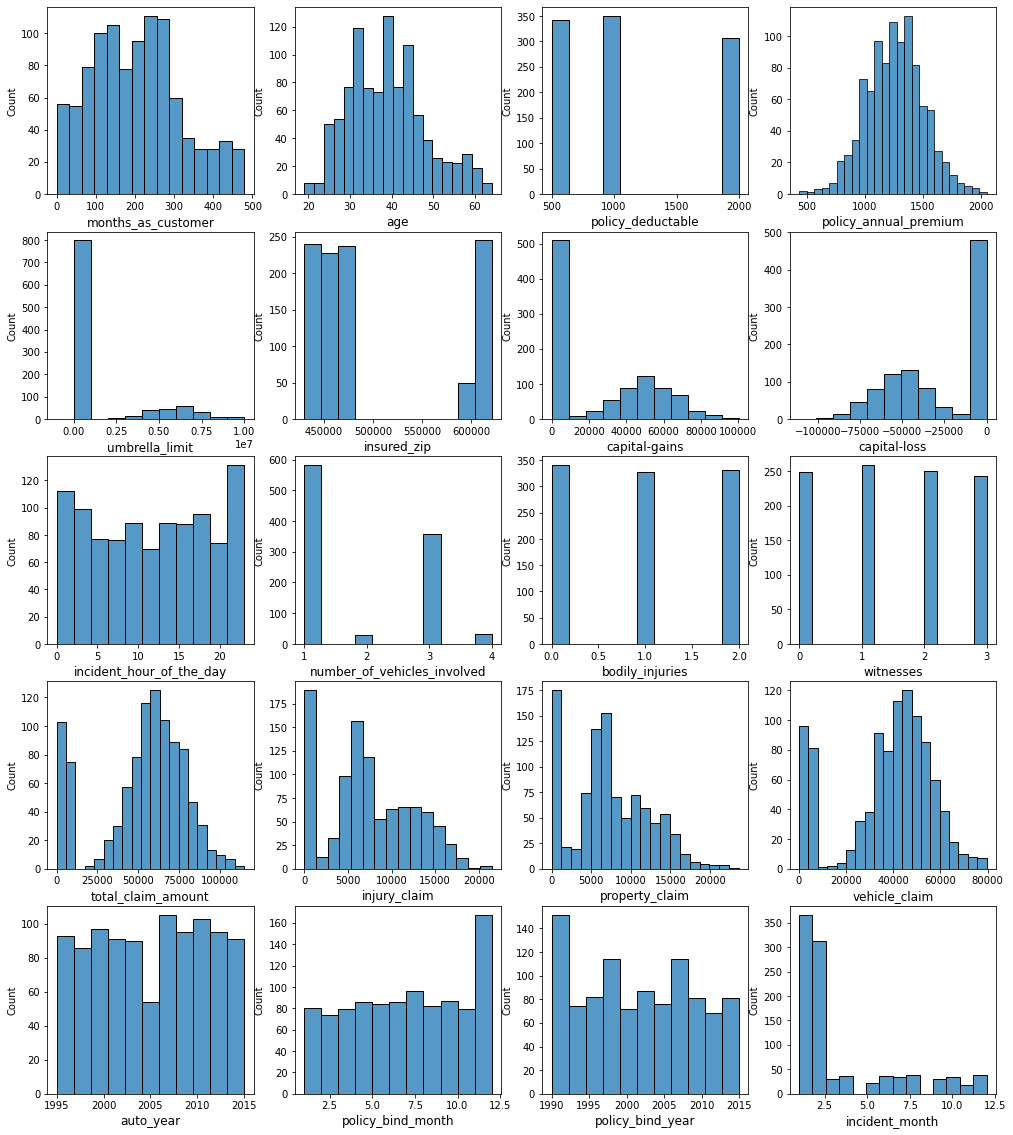

In [139]:
#Checking of histogram each columns having numerical data
plt.figure(figsize=(17,20))
pltno = 1
for columns in numerical:
    if pltno <=20:
        ax = plt.subplot(5,4,pltno)
        sns.histplot(df[columns])
        plt.xlabel(columns, fontsize=12)       
    pltno += 1
plt.show()

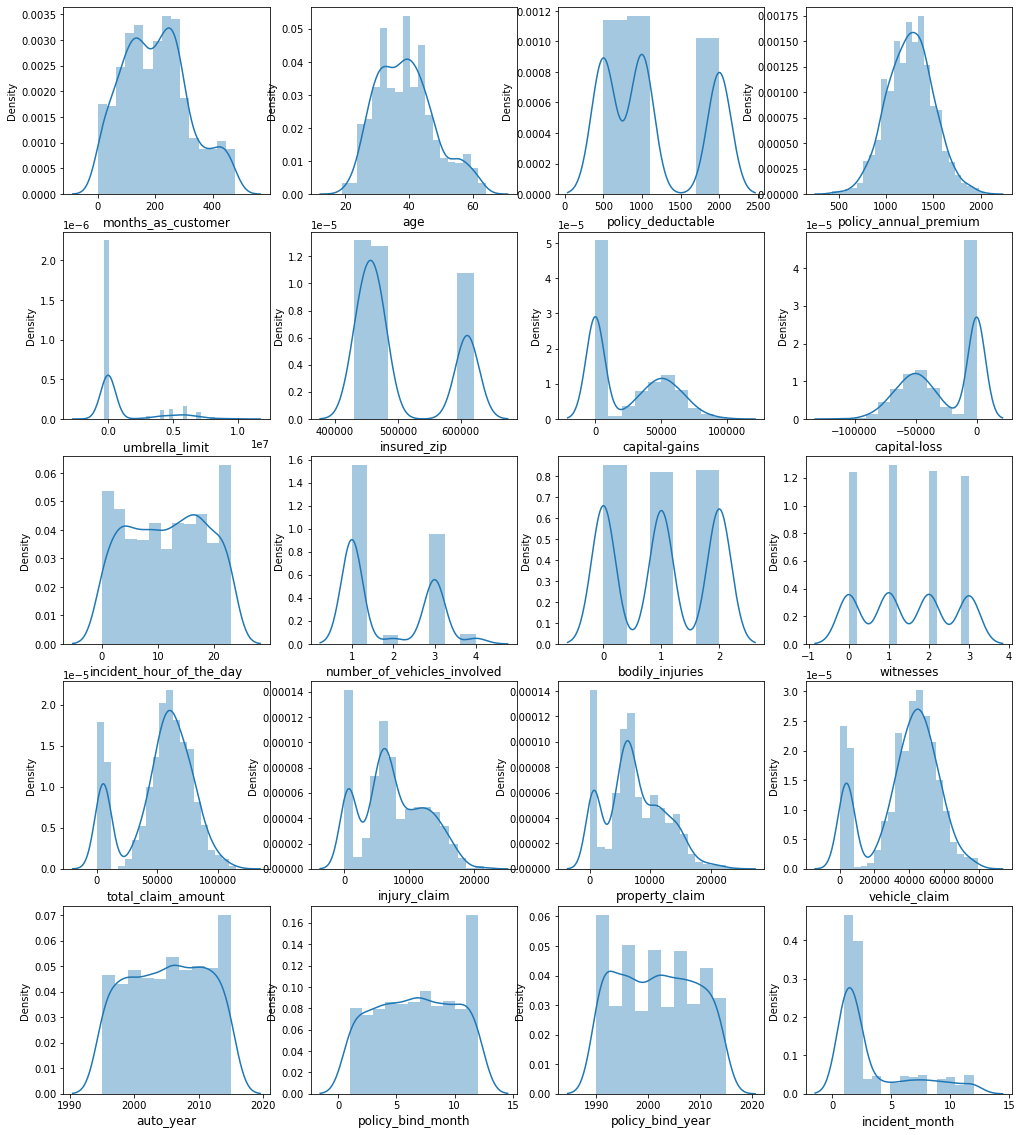

In [140]:
#Checking of distribution plot of each columns having numerical data
plt.figure(figsize=(17,20))
pltno = 1
for columns in numerical:
    if pltno <=20:
        ax = plt.subplot(5,4,pltno)
        sns.distplot(df[columns])
        plt.xlabel(columns, fontsize=12)       
    pltno += 1
plt.show()

We can observe that Months_as_customers, age, policy annual premium has approximately well normally distributed

Injury claim, property claim, capital gains, incident month all these data are right skewed

All columns to be properly transformed for obtaining normal distribution

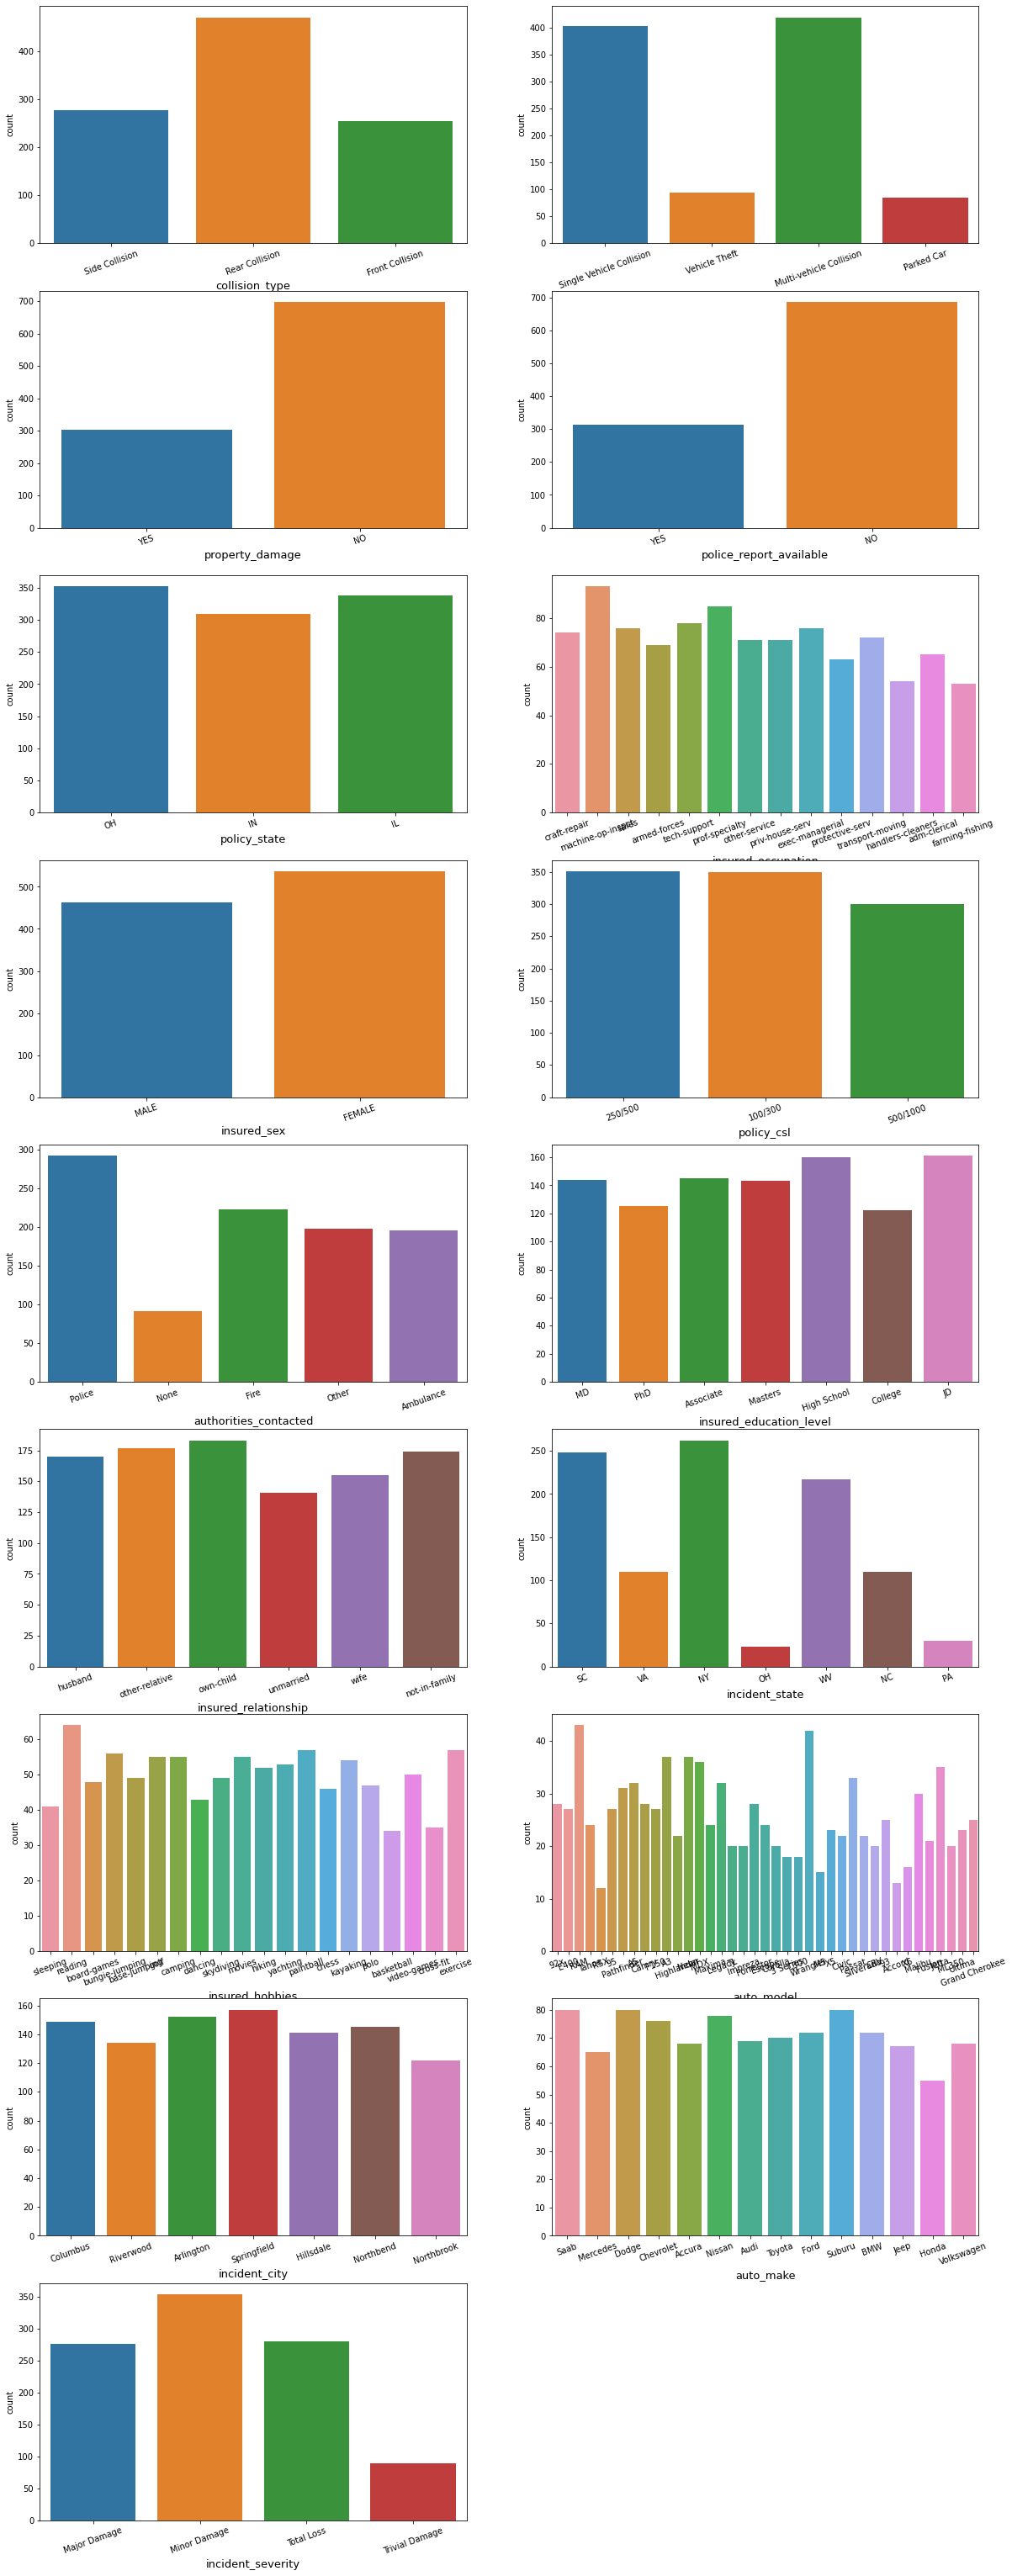

In [141]:
#Categorical
#Checking of value counts in each columns having categorical data
plt.figure(figsize=(20,55))
pltno = 1
for columns in categorical:
    if pltno <=18:
        ax = plt.subplot(9,2,pltno)
        sns.countplot(df[columns])
        plt.xlabel(columns, fontsize=13) 
        plt.xticks(rotation = 20)
    pltno += 1
plt.show()

Majority of cases occured due to rear collision

Majority of cases occured due to both single and multi vehicle collision

In majority of cases there are no property damage and not complained to police

In most of cases the incident severity is not a minor damage

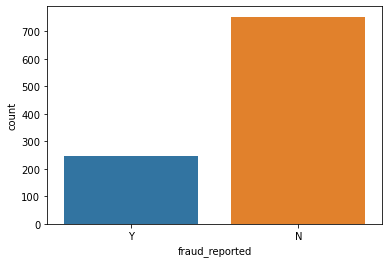

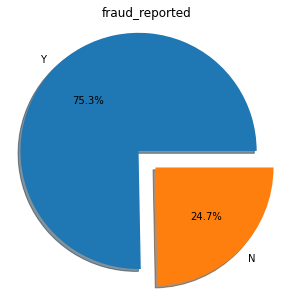

In [142]:
#Checking of value counts in target variable
sns.countplot(df['fraud_reported'])
plt.show()

var = 'fraud_reported'
plt.figure(figsize=(5,5))
data = list(df[var].value_counts())
plt.pie(data, labels= ['Y','N'], autopct='%1.1f%%', explode=[0.1,0.1], shadow=True)
plt.axis('equal')
plt.title(var)
plt.show()

Target data seems to be with 75:25 of Y:N class ratio

Need to be balanced by proper sampling technique

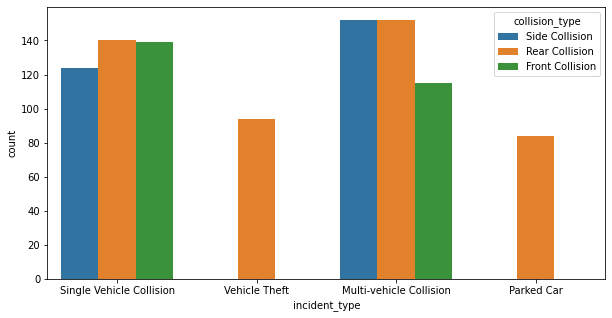

In [143]:
#Collision type and incident type vizualization
plt.figure(figsize=(10, 5))
sns.countplot(df['incident_type'], hue=df['collision_type'])
plt.show()

In case of parked car there is only accident due to rare collision

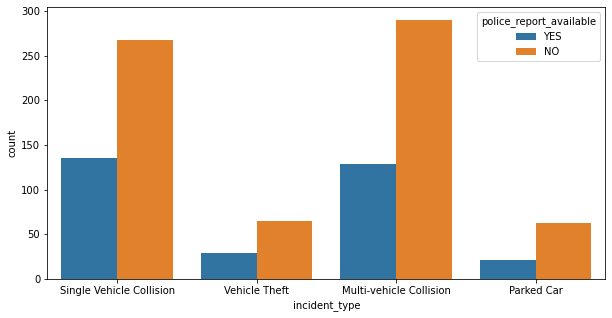

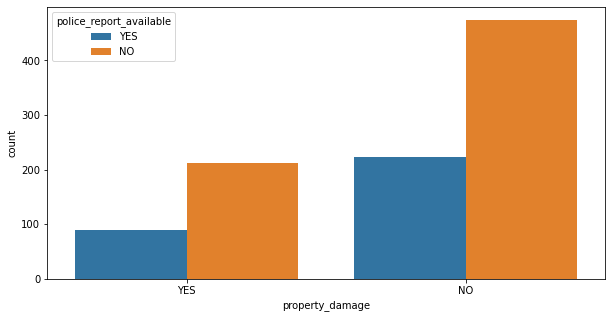

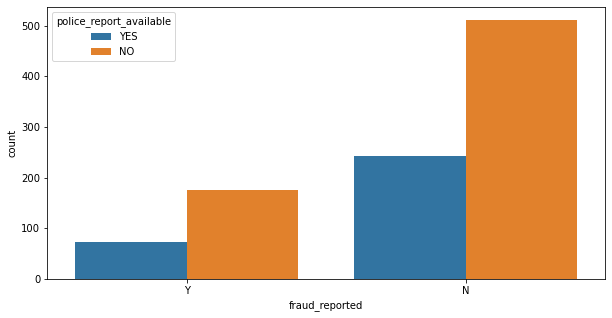

In [144]:
#police_report_available and incident type vizualization
plt.figure(figsize=(10, 5))
sns.countplot(df['incident_type'], hue=df['police_report_available'])
plt.show()

#police_report_available and incident type vizualization
plt.figure(figsize=(10, 5))
sns.countplot(df['property_damage'], hue=df['police_report_available'])
plt.show()

#police_report_available and incident type vizualization
plt.figure(figsize=(10, 5))
sns.countplot(df['fraud_reported'], hue=df['police_report_available'])
plt.show()

Similarity in proportion of true and fraud reports found in case of

1) Single and multi vehicle collision

2) Vehicle theft and parked car cases

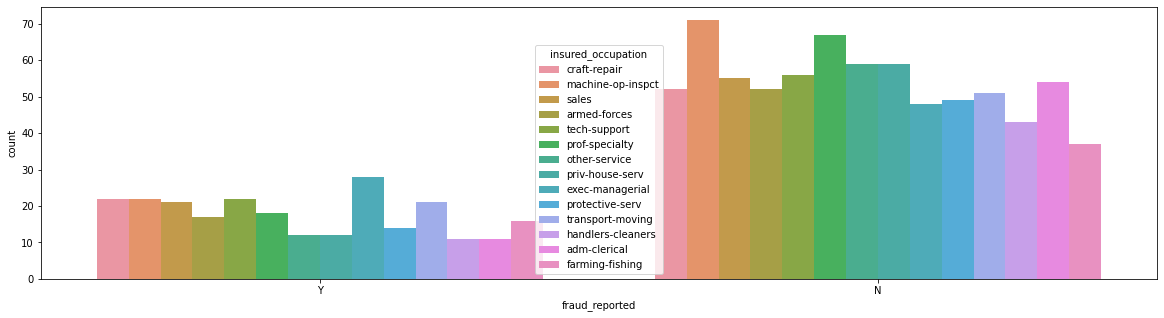

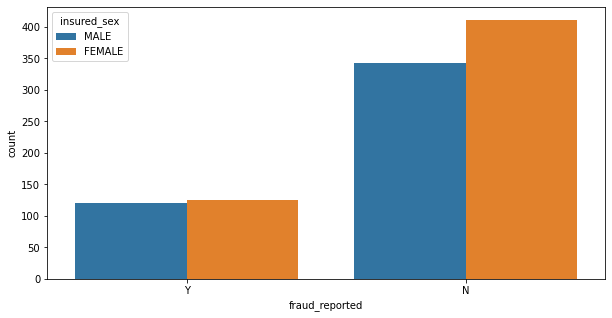

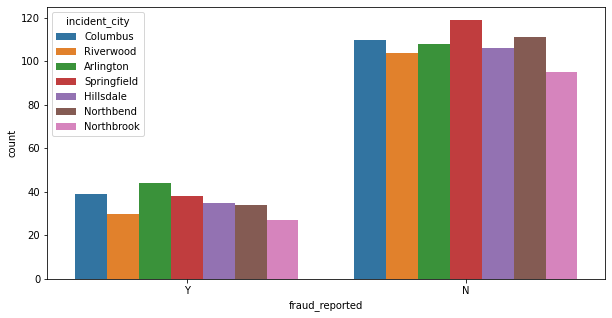

In [145]:
#fraud_reported and insured_occupation vizualization
plt.figure(figsize=(20, 5))
sns.countplot(df['fraud_reported'], hue=df['insured_occupation'])
plt.show()

#fraud_reported and insured_sex vizualization
plt.figure(figsize=(10, 5))
sns.countplot(df['fraud_reported'], hue=df['insured_sex'])
plt.show()

#fraud_reported and incident_city vizualization
plt.figure(figsize=(10, 5))
sns.countplot(df['fraud_reported'], hue=df['incident_city'])
plt.show()

Among the claim reports found (based on occupation)

1) More non froad reports has been made by craft repair professionals

2) Least number of non froad reports has been made by farming and fishing professionals


Among the claim reports found (based on sex)

1) More non froad reports has been made by female

2) Equal proportion of fraud reports has been made by both male and female

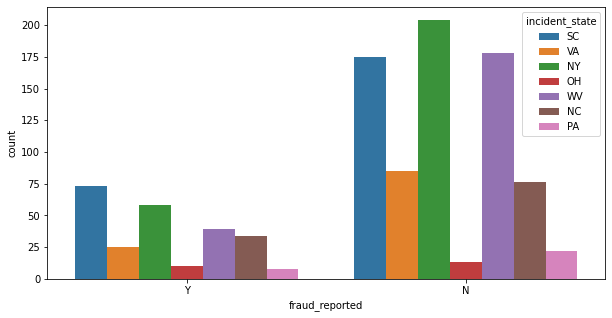

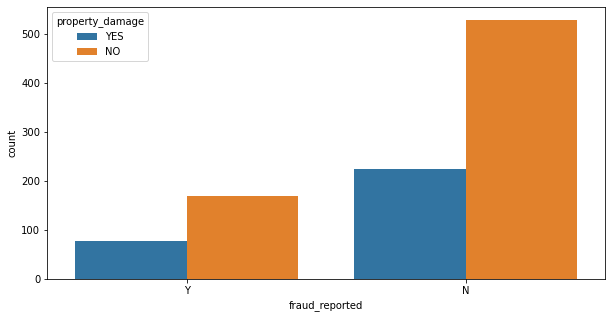

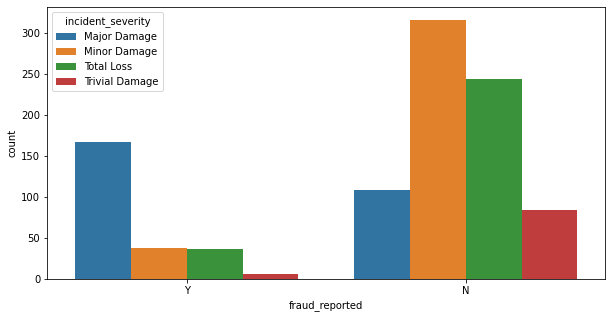

In [146]:
#fraud_reported and incident_state vizualization
plt.figure(figsize=(10, 5))
sns.countplot(df['fraud_reported'], hue=df['incident_state'])
plt.show()

#fraud_reported and property_damage vizualization
plt.figure(figsize=(10, 5))
sns.countplot(df['fraud_reported'], hue=df['property_damage'])
plt.show()

#fraud_reported and incident_city vizualization
plt.figure(figsize=(10, 5))
sns.countplot(df['fraud_reported'], hue=df['incident_severity'])
plt.show()

Among the claim reports found (based on state)

1) More non froad reports has been made by people of NY and least by OH

2) More non froad reports has been made by people of SC and least by PA

Among the claim reports found (based on incident severity)

1) More non froad reports has been made in case of minor damage

2) More froad reports has been made in case of major damage


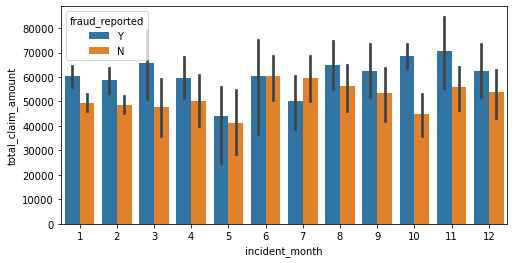

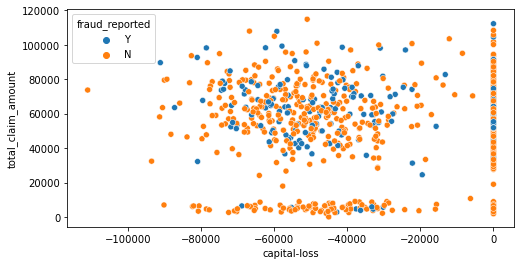

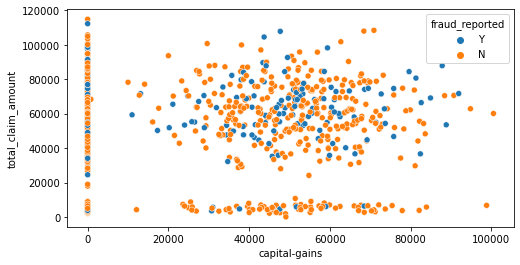

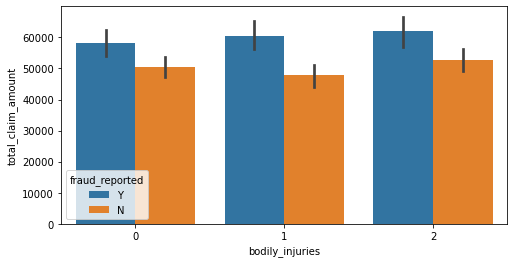

In [147]:
#Vizualization of evaporation vs rainfall
plt.figure(figsize=(8,4))
sns.barplot(y = df['total_claim_amount'], x = df['incident_month'], hue = df['fraud_reported'])
plt.show()

plt.figure(figsize=(8,4))
sns.scatterplot(y = df['total_claim_amount'], x = df['capital-loss'], hue = df['fraud_reported'])
plt.show()

plt.figure(figsize=(8,4))
sns.scatterplot(y = df['total_claim_amount'], x = df['capital-gains'], hue = df['fraud_reported'])
plt.show()

plt.figure(figsize=(8,4))
sns.barplot(y = df['total_claim_amount'], x = df['bodily_injuries'], hue = df['fraud_reported'])
plt.show()

For each incident month fraud report exceeds genuine claims

Among the months, during november more no. of fraud reports found and least in May

Almost similar propotions of report of 0,1,2 body injuries found fraud claim

In [148]:
#Encoding the target data
df['fraud_reported'] = df['fraud_reported'].replace({"Y":1, "N":0 })

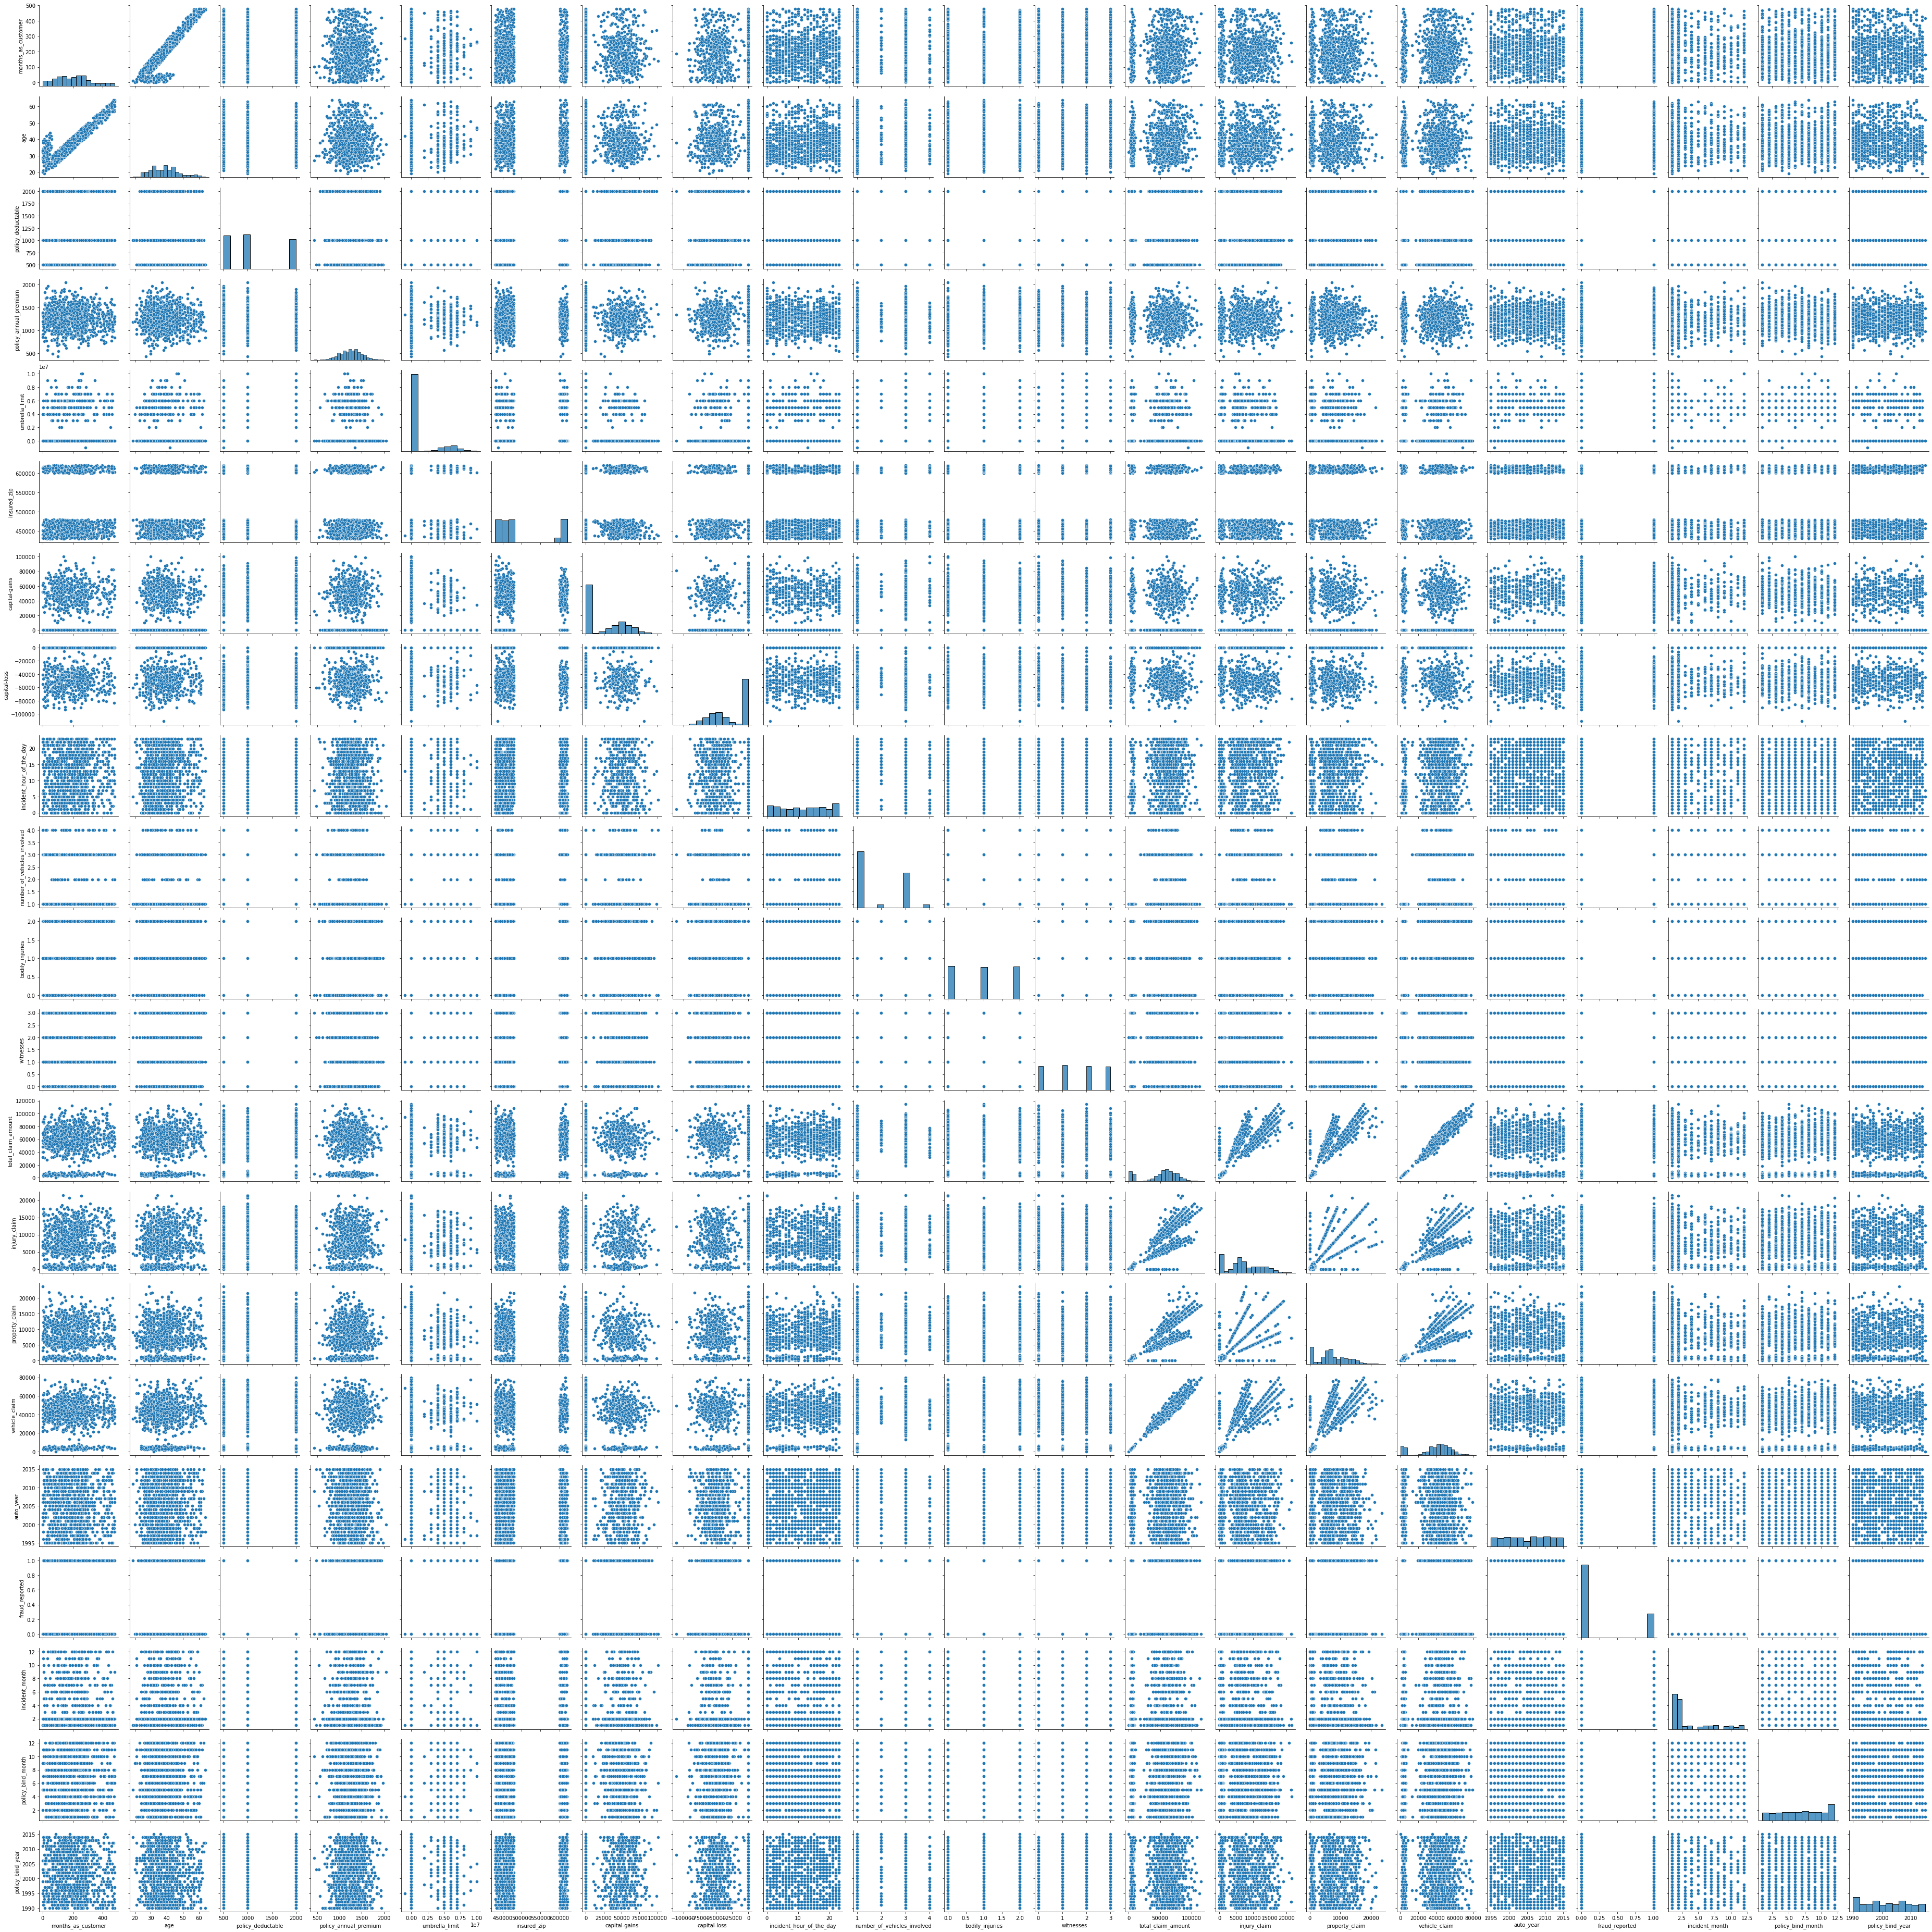

In [149]:
#Plotting all possible bivariate plots together
sns.pairplot(df)
plt.show()

We can observe some input features has correlation among each other: This multicollinearity issue must be addressed later:

Months as customer vs age

injury claim, vs total claim amount

property claim, vs total claim amount

vehicle claim vs total claim amount

property claim, vs injury claim

vehicle claim vs injury claim

property claim vs vehicle claim

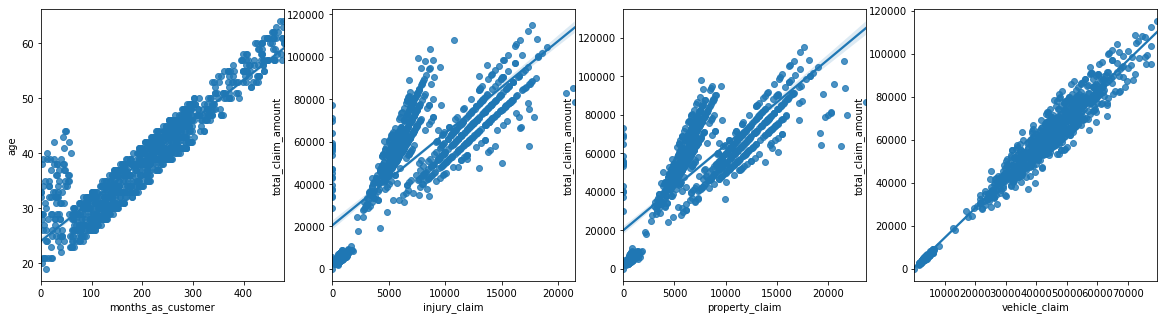

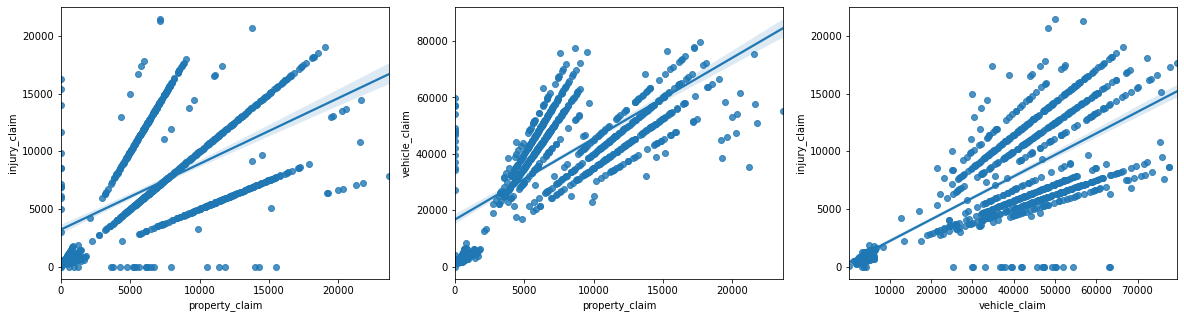

In [150]:
#Let us vizualize inter correlation (multicollinearity) among these input feature columns
plt.figure(figsize=(20,5))
ax = plt.subplot(1,4,1)
sns.regplot(x = df['months_as_customer'], y = df['age'])
ax = plt.subplot(1,4,2)
sns.regplot(x = df['injury_claim'], y = df['total_claim_amount'])
ax = plt.subplot(1,4,3)
sns.regplot(x = df['property_claim'], y = df['total_claim_amount'])
ax = plt.subplot(1,4,4)
sns.regplot(x = df['vehicle_claim'], y = df['total_claim_amount'])
plt.show()

plt.figure(figsize=(20,5))
ax = plt.subplot(1,3,1)
sns.regplot(x = df['property_claim'], y = df['injury_claim'])
ax = plt.subplot(1,3,2)
sns.regplot(x = df['property_claim'], y = df['vehicle_claim'])
ax = plt.subplot(1,3,3)
sns.regplot(x = df['vehicle_claim'], y = df['injury_claim'])
plt.show()

These multicollinearity issues need to be resolved before training the model

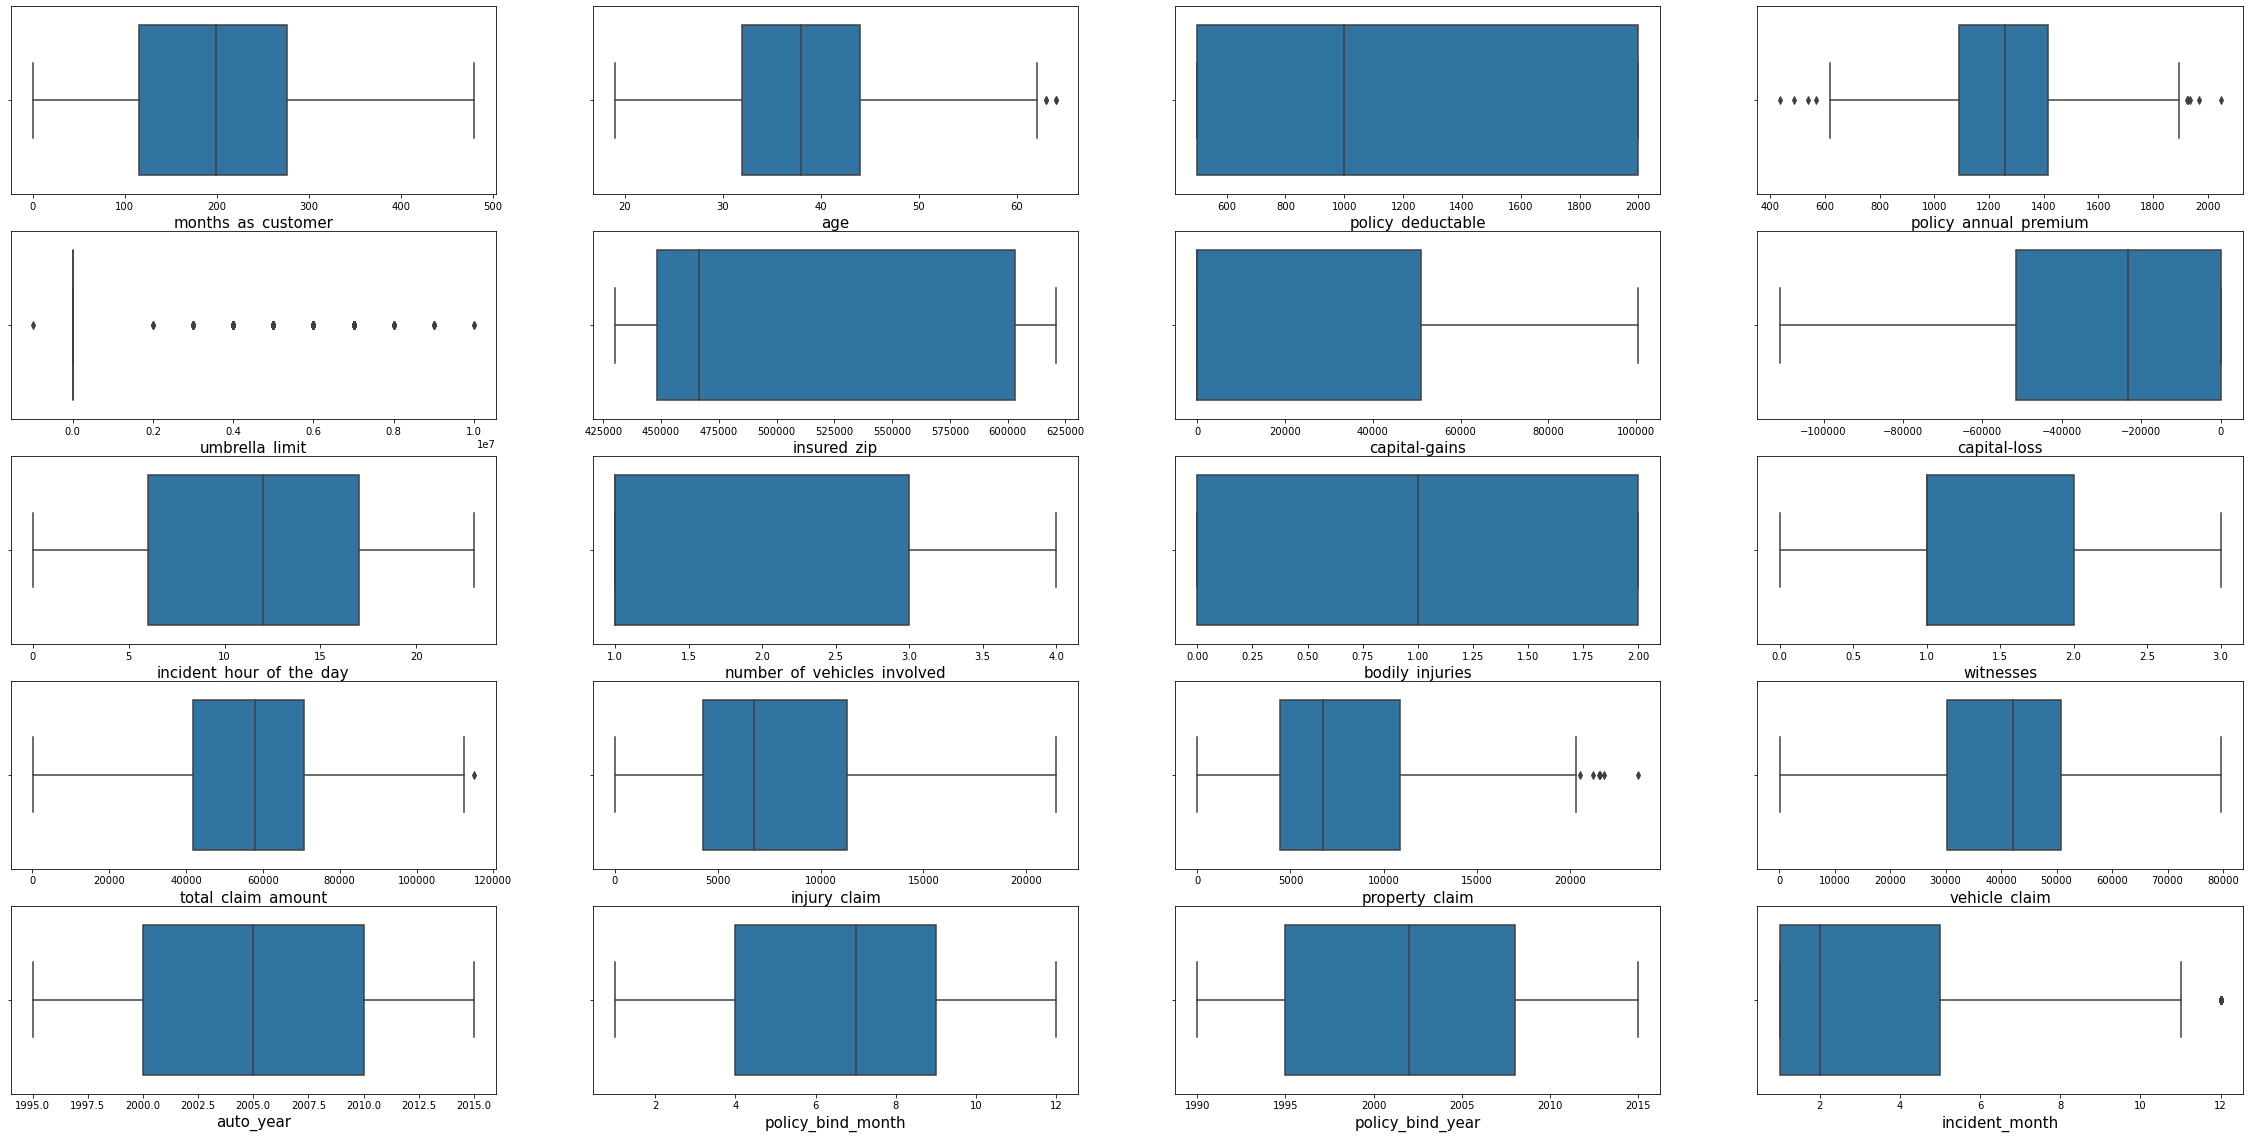

In [151]:
#Outliers/noise checking for input numerical feature columns
plt.figure(figsize=(40,20))
pltno = 1
for columns in numerical:
    if pltno <=20:
        ax = plt.subplot(5,4,pltno)
        sns.boxplot(x = df[columns])
        plt.xlabel(columns, fontsize=15)       
    pltno += 1
plt.show()

The outliers must be handled before training the model

In [152]:
#Statistical summary of the data
df.describe()

months_as_customer          age  policy_deductable  \
count         1000.000000  1000.000000        1000.000000   
mean           203.954000    38.948000        1136.000000   
std            115.113174     9.140287         611.864673   
min              0.000000    19.000000         500.000000   
25%            115.750000    32.000000         500.000000   
50%            199.500000    38.000000        1000.000000   
75%            276.250000    44.000000        2000.000000   
max            479.000000    64.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  fraud_reported  \
count     1000.000000    1000.000000  1000.000000     1000.000000   
mean      7399.570000   37928.950000  2005.103000        0.247000   
std       4824.726179   18886.252893     6.015861        0.431483   
min          0.000000      70.000000  1995.000000        0.000000   
25%       4445.000000   30292.500000  2000.000000        0.000000   
50%       6750.000000   42100.000000  2005.000000        0.000000   
75%      10885.000000   50822.500000  2010.000000        0.000000   
max      23670.000000   79560.000000  2015.000000        1.000000   

       incident_month  policy_bind_month  policy_bind_year  
count     1000.000000        1000.000000       1000.000000  
mean         3.407000           6.559000       2001.604000  
std          3.276291           3.391758          7.360391  
min          1.000000           1.000000       1990.000000  
25%          1.000000           4.000000       1995.000000  
50%          2.000000           7.000000       2002.000000  
75%          5.000000           9.000000       2008.000000  
max         12.000000          12.000000       2015.000000

In [153]:
#Coefficient of correlation matrix
df.corr()

months_as_customer       age  policy_deductable  \
months_as_customer                     1.000000  0.922098           0.026807   
age                                    0.922098  1.000000           0.029188   
policy_deductable                      0.026807  0.029188           1.000000   
policy_annual_premium                  0.005018  0.014404          -0.003245   
umbrella_limit                         0.015498  0.018126           0.010870   
insured_zip                            0.017895  0.025604           0.004545   
capital-gains                          0.006399 -0.007075           0.035212   
capital-loss                           0.020209  0.007368          -0.023544   
incident_hour_of_the_day               0.070639  0.087161           0.060935   
number_of_vehicles_involved            0.014736  0.022102           0.051214   
bodily_injuries                       -0.010162 -0.015679          -0.022765   
witnesses                              0.058383  0.052359           0.066639   
total_claim_amount                     0.062108  0.069863           0.022839   
injury_claim                           0.065329  0.075522           0.039107   
property_claim                         0.034940  0.060898           0.064792   
vehicle_claim                          0.061013  0.062588           0.005269   
auto_year                             -0.000292  0.001354           0.026105   
fraud_reported                         0.020544  0.012143           0.014817   
incident_month                         0.024659  0.023404          -0.006418   
policy_bind_month                      0.005750  0.015501          -0.050416   
policy_bind_year                      -0.048276 -0.037444          -0.049598   

                             policy_annual_premium  umbrella_limit  \
months_as_customer                        0.005018        0.015498   
age                                       0.014404        0.018126   
policy_deductable                        -0.003245        0.010870   
policy_annual_premium                     1.000000       -0.006247   
umbrella_limit                           -0.006247        1.000000   
insured_zip                               0.032354        0.019671   
capital-gains                            -0.013738       -0.047268   
capital-loss                              0.023547       -0.024056   
incident_hour_of_the_day                 -0.001578       -0.023257   
number_of_vehicles_involved              -0.045991       -0.021270   
bodily_injuries                           0.026780        0.022743   
witnesses                                 0.002332       -0.006738   
total_claim_amount                        0.009094       -0.040344   
injury_claim                             -0.017633       -0.045412   
property_claim                           -0.011654       -0.023790   
vehicle_claim                             0.020246       -0.038584   
auto_year                                -0.049226        0.009893   
fraud_reported                           -0.014480        0.058622   
incident_month                            0.021559        0.042409   
policy_bind_month                        -0.035355        0.009961   
policy_bind_year                          0.001249        0.048008   

                             insured_zip  capital-gains  capital-loss  \
months_as_customer              0.017895       0.006399      0.020209   
age                             0.025604      -0.007075      0.007368   
policy_deductable               0.004545       0.035212     -0.023544   
policy_annual_premium           0.032354      -0.013738      0.023547   
umbrella_limit                  0.019671      -0.047268     -0.024056   
insured_zip                     1.000000       0.006303      0.049372   
capital-gains                   0.006303       1.000000     -0.046904   
capital-loss                    0.049372      -0.046904      1.000000   
incident_hour_of_the_day        0.008274      -0.016406     -0.025054 

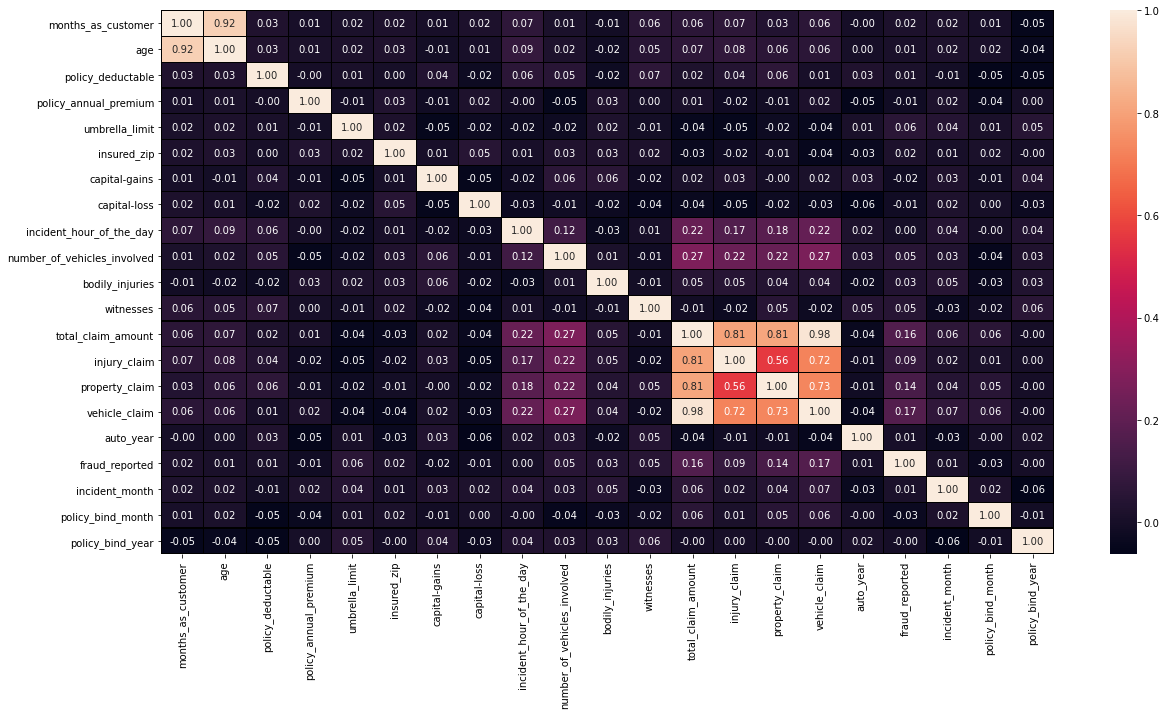

In [154]:
#Heatmap to vizualize correlation between different features
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, linewidths=0.1, linecolor='black', fmt='0.2f')
plt.show()

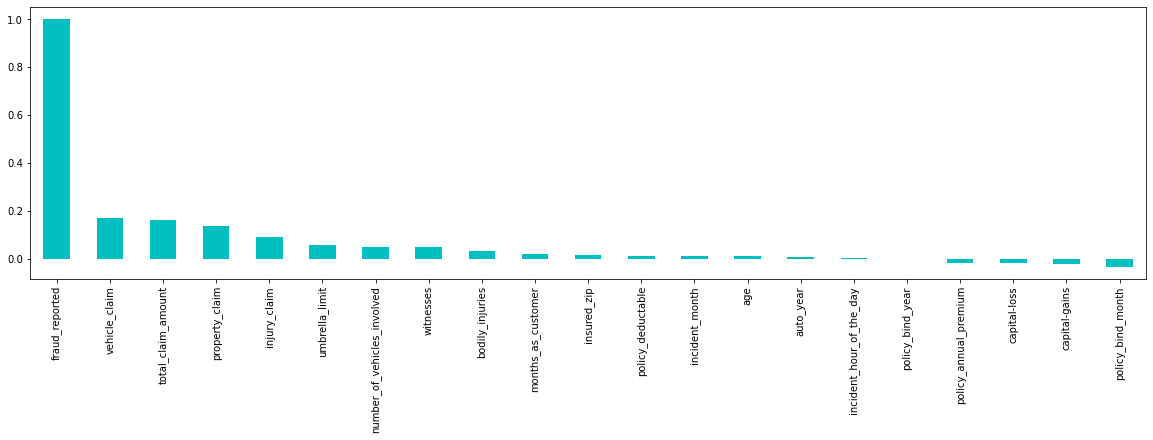

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
injury_claim                   0.090975
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
months_as_customer             0.020544
insured_zip                    0.019368
policy_deductable              0.014817
incident_month                 0.014495
age                            0.012143
auto_year                      0.007928
incident_hour_of_the_day       0.004316
policy_bind_year              -0.000059
policy_annual_premium         -0.014480
capital-loss                  -0.014863
capital-gains                 -0.019173
policy_bind_month             -0.030829
Name: fraud_reported, dtype: float64

In [155]:
#Sorting descending values of correlation data of target variable
#Plotting the same for vizualization
plt.figure(figsize=(20,5))
df.corr()['fraud_reported'].sort_values(ascending=False).plot(kind='bar', color='c')
plt.show()
df.corr()['fraud_reported'].sort_values(ascending=False)

In [156]:
#Encoding the categorical/text type data into numerical form
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

for i in categorical:
    df[i] = enc.fit_transform(df[i].values.reshape(-1,1))
    
df.head()

months_as_customer  age  policy_state  policy_csl  policy_deductable  \
0                 328   48             2           1               1000   
1                 228   42             1           1               2000   
2                 134   29             2           0               2000   
3                 256   41             0           1               2000   
4                 228   44             0           2               1000   

   policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0                1406.91               0       466132            1   
1                1197.22         5000000       468176            1   
2                1413.14         5000000       430632            0   
3                1415.74         6000000       608117            0   
4                1583.91         6000000       610706            1   

   insured_education_level  insured_occupation  insured_hobbies  \
0                        4                   2               17   
1                        4                   6               15   
2                        6                  11                2   
3                        6                   1                2   
4                        0                  11                2   

   insured_relationship  capital-gains  capital-loss  incident_type  \
0                     0          53300             0              2   
1                     2              0             0              3   
2                     3          35100             0              0   
3                     4          48900        -62400              2   
4                     4          66000        -46000              3   

   collision_type  incident_severity  authorities_contacted  incident_state  \
0               2                  0                      4               4   
1               1                  1                      4               5   
2               1                  1                      4               1   
3               0                  0                      4               2   
4               1                  1                      2               1   

   incident_city  incident_hour_of_the_day  number_of_vehicles_involved  \
0              1                         5                            1   
1              5                         8                            1   
2              1                         7                            3   
3              0                         5                            1   
4              0                        20                            1   

   property_damage  bodily_injuries  witnesses  police_report_available  \
0                1                1          2                        1   
1                0                0          0                        0   
2                0                2          3                        0   
3                0                1          2                        0   
4                0                0          1                        0   

   total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  \
0               71610          6510           13020          52080         10   
1                5070           780             780           3510          8   
2               34650          7700            3850          23100          4   
3               63400          6340            6340          50720          3   
4                6500          1300             650           4550          0   

   auto_model  auto_year  fraud_reported  incident_month  policy_bind_month  \
0           1       2004               1               1                 10   
1          12       2007               1               1                  6   
2          30       2007               0               2                  6   
3          34       2014               1              10                  5   
4          31       2009               0  

In [157]:
#Removing of outliers by zscore method
print('Shape before',df.shape)
from scipy.stats import zscore
z=np.abs(zscore(df[numerical]))
df_new = df[(z<3).all(axis=1)]
print('Shape after',df_new.shape)

#Percentage loss of data
loss = (df.shape[0]-df_new.shape[0])*100/(df.shape[0])
print(loss,'% loss of data')

Shape before (1000, 38)
Shape after (980, 38)
2.0 % loss of data


In [254]:
#Seperate feature and target columns
x = df_new.drop('fraud_reported', axis=1)
y = df_new['fraud_reported']
print('x shape',x.shape)
print('y shape',y.shape)

x shape (980, 37)
y shape (980,)


In [255]:
#We need to scale the data before applying PCA technique to handle multicollinearity
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_new = sc.fit_transform(x)
x_new = pd.DataFrame(x_new, columns = x.columns)

## Feature selection

In [256]:
#VIF method to check multicollinearity 
#Checing for continuous input feature columns
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif = [variance_inflation_factor(x_new[numerical].values,i) for i in range(x_new[numerical].shape[1])]
vif

[6.853312413736542,
 6.864461171886586,
 1.0323509917350755,
 1.0131827816289676,
 1.01394250334733,
 1.0138290322663208,
 1.0168146074932674,
 1.0173377648657378,
 1.0728014902523126,
 1.1007202635969842,
 1.0172339796098127,
 1.0279490217614882,
 inf,
 inf,
 inf,
 inf,
 1.0175340894136493,
 1.0164467267618753,
 1.021772705768525,
 1.0197706166279894]

In [258]:
#Let us remove injury claim and check
numerical = ['months_as_customer', 'age','policy_deductable', 'policy_annual_premium',
             'umbrella_limit', 'insured_zip','capital-gains', 'capital-loss',
             'incident_hour_of_the_day', 'number_of_vehicles_involved','bodily_injuries', 'witnesses',
             'total_claim_amount', 'property_claim', 'vehicle_claim',
             'auto_year','policy_bind_month','policy_bind_year','incident_month']
#Checing for continuous input feature columns
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif = [variance_inflation_factor(x_new[numerical].values,i) for i in range(x_new[numerical].shape[1])]
vif

[6.853312413736542,
 6.864461171886586,
 1.0323509917350755,
 1.0131827816289676,
 1.01394250334733,
 1.0138290322663206,
 1.0168146074932674,
 1.0173377648657378,
 1.0728014902523126,
 1.1007202635969842,
 1.0172339796098127,
 1.0279490217614882,
 62.04555576555815,
 4.614110218614472,
 45.828878968327366,
 1.0175340894136493,
 1.0164467267618753,
 1.021772705768525,
 1.0197706166279894]

In [259]:
#Let us remove age, vehicle claim and check
numerical = ['months_as_customer','policy_deductable', 'policy_annual_premium',
             'umbrella_limit', 'insured_zip','capital-gains', 'capital-loss',
             'incident_hour_of_the_day', 'number_of_vehicles_involved','bodily_injuries', 'witnesses',
             'total_claim_amount', 'property_claim',
             'auto_year','policy_bind_month','policy_bind_year','incident_month']
#Checing for continuous input feature columns
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif = [variance_inflation_factor(x_new[numerical].values,i) for i in range(x_new[numerical].shape[1])]
vif

[1.0168819011464791,
 1.029457519053107,
 1.0099032879553664,
 1.0137510699458532,
 1.0125811920716261,
 1.015815463462918,
 1.0163705511319603,
 1.0700535892497087,
 1.1004435157905645,
 1.0167111660417958,
 1.0275905911238417,
 3.131199588156777,
 2.9894034550999744,
 1.0167544901740648,
 1.0138617641669676,
 1.0214320120423763,
 1.017258639496385]

VIF is within the limit of 5 and hence issue of multicollinearity resolved

In [265]:
x = x_new[numerical+categorical]
y = y
print('x shape',x.shape)
print('y shape',y.shape)
x.head()

x shape (980, 34)
y shape (980,)


months_as_customer  policy_deductable  policy_annual_premium  \
0            1.069568          -0.224643               0.620031   
1            0.202726           1.412161              -0.248448   
2           -0.612105           1.412161               0.645834   
3            0.445442           1.412161               0.656603   
4            0.202726          -0.224643               1.353117   

   umbrella_limit  insured_zip  capital-gains  capital-loss  \
0       -0.467878    -0.484014       1.003849      0.955432   
1        1.890767    -0.455363      -0.906228      0.955432   
2        1.890767    -0.981629       0.351628      0.955432   
3        2.362496     1.506233       0.846169     -1.278119   
4        2.362496     1.542524       1.458971     -0.691096   

   incident_hour_of_the_day  number_of_vehicles_involved  bodily_injuries  \
0                 -0.960633                    -0.820087         0.002498   
1                 -0.529777                    -0.820087        -1.221626   
2                 -0.673396                     1.144914         1.226623   
3                 -0.960633                    -0.820087         0.002498   
4                  1.193647                    -0.820087        -1.221626   

   witnesses  total_claim_amount  property_claim  auto_year  \
0   0.466378            0.718507        1.176015  -0.188594   
1  -1.333033           -1.808821       -1.378984   0.310476   
2   1.366083           -0.685311       -0.738147   0.310476   
3   0.466378            0.406674       -0.218380   1.474975   
4  -0.433327           -1.754507       -1.406121   0.643190   

   policy_bind_month  policy_bind_year  incident_month  collision_type  \
0           1.013473          1.683157       -0.733396        1.345272   
1          -0.162612          0.600279       -0.733396       -0.029459   
2          -0.162612         -0.211879       -0.427163       -0.029459   
3          -0.456633         -1.565477        2.022697       -1.404189   
4          -0.162612          1.683157       -0.427163       -0.029459   

   incident_type  property_damage  police_report_available  policy_state  \
0       0.761515         1.512809                 1.473608      1.179821   
1       1.687428        -0.661022                -0.678606     -0.024580   
2      -1.090309        -0.661022                -0.678606      1.179821   
3       0.761515        -0.661022                -0.678606     -1.228980   
4       1.687428        -0.661022                -0.678606     -1.228980   

   insured_occupation  insured_sex  policy_csl  authorities_contacted  \
0           -1.156087     1.071971    0.067231               1.198446   
1           -0.160292     1.071971    0.067231               1.198446   
2            1.084451    -0.932861   -1.175916               1.198446   
3           -1.405036    -0.932861    0.067231               1.198446   
4            1.084451     1.071971    1.310379              -0.106529   

   insured_education_level  insured_relationship  incident_state  \
0                 0.532901             -1.437247        0.351070   
1                 0.532901             -0.248136        0.814748   
2                 1.556905              0.346420       -1.039963   
3                 1.556905              0.940975       -0.576285   
4                -1.515109              0.940975       -1.039963   

   insured_hobbies  auto_model  incident_city  auto_make  incident_severity  
0         1.275279   -1.640447      -0.973760   0.851959          -1.259947  
1         0.923775   -0.651740       0.990800   0.355279          -0.195509  
2        -1.361003    0.966145      -0.973760  -0.638083          -0.195509  
3        -1.361003    1.325675      -1.464901  -0.886423          -1.259947  
4        -1.361003    1.056027      -1.464901  -1.631444          -0.195509

In [266]:
x[numerical].skew()

months_as_customer             0.362608
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_zip                    0.837283
capital-gains                  0.466619
capital-loss                  -0.376884
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725
bodily_injuries                0.003757
witnesses                      0.026211
total_claim_amount            -0.593593
property_claim                 0.361356
auto_year                     -0.054522
policy_bind_month             -0.024643
policy_bind_year               0.065022
incident_month                 1.388336
dtype: float64

In [267]:
#Apply power transform to reduce skewness
from sklearn.preprocessing import PowerTransformer
po = PowerTransformer()
for col in numerical:
    if x.skew().loc[col]>0.55:
        x[col] = po.fit_transform(x[col].values.reshape(-1,1))
x[numerical].skew()

months_as_customer             0.362608
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.300723
insured_zip                    0.402503
capital-gains                  0.466619
capital-loss                  -0.376884
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725
bodily_injuries                0.003757
witnesses                      0.026211
total_claim_amount            -0.593593
property_claim                 0.361356
auto_year                     -0.054522
policy_bind_month             -0.024643
policy_bind_year               0.065022
incident_month                 0.496540
dtype: float64

Let us drop 'umbrella_limit' as its skewness not got reduced below 0.55

In [268]:
x = x.drop('umbrella_limit', axis=1)
y = y

In [269]:
#Feature selection
from sklearn.ensemble import ExtraTreesClassifier
fs = ExtraTreesClassifier()
fs.fit(x, y)

ExtraTreesClassifier()

In [270]:
imp = fs.feature_importances_
for index, val in enumerate(imp):
    print(index, round((val * 100), 2))

0 2.96
1 2.52
2 2.7
3 3.04
4 2.48
5 2.45
6 2.77
7 1.68
8 2.45
9 2.59
10 3.44
11 3.52
12 2.74
13 3.1
14 2.75
15 2.66
16 2.23
17 1.84
18 1.86
19 1.66
20 2.43
21 3.05
22 1.91
23 2.5
24 2.67
25 2.5
26 2.66
27 2.82
28 4.0
29 2.66
30 2.91
31 2.66
32 15.79


In [272]:
#Let us select important features and drop rest columns. By considering top 70% are important
#Dropping off less important columns
x =  x.drop(['number_of_vehicles_involved', 'property_damage','incident_type','police_report_available','insured_sex','policy_csl','collision_type','capital-loss'], axis=1)

In [273]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smt = SMOTE(1.0) #Up sampling to 1:1 ratio of target variable
x1, y1 = smt.fit_resample(x, y)

print('Before', Counter(y))
print('After', Counter(y1))

Before Counter({0: 740, 1: 240})
After Counter({1: 740, 0: 740})


In [275]:
#Logistic regression
#Best randm state selection
max_acc = 0
max_RS = 0
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score
lr = LogisticRegression()
for i in range(0,200):
    xtr, xt, ytr, yt = train_test_split(x,y, random_state=i,test_size=0.2)
    lr.fit(xtr, ytr)
    predyt = lr.predict(xt)
    accuracy = accuracy_score(yt,predyt)  
    if accuracy > max_acc:
        max_acc = accuracy
        max_RS = i
        print('At Max RS',i,'Max Accuracy =',accuracy)

At Max RS 0 Max Accuracy = 0.7755102040816326
At Max RS 1 Max Accuracy = 0.7857142857142857
At Max RS 3 Max Accuracy = 0.8214285714285714
At Max RS 9 Max Accuracy = 0.8418367346938775


In [276]:
def metric_score(model, xtr, xt, ytr, yt, train=True):
    if train:
        ypr = model.predict(xtr)
        print(f"Accuracy score of train is : {(accuracy_score(ytr, ypr))*100:.2f}%")
        
    elif train==False:
        ypr = model.predict(xt)
        print(f"Accuracy score of test is : {(accuracy_score(yt, ypr))*100:.2f}%",'\n\nClassification report:')
        print(classification_report(yt, ypr))

In [277]:
#Using best random state for train test split
xtr, xt, ytr, yt = train_test_split(x,y, random_state=9,test_size=0.2)
#Training the model
model = LogisticRegression()
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 78.32%
Accuracy score of test is : 84.18% 

Classification report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       155
           1       0.66      0.51      0.58        41

    accuracy                           0.84       196
   macro avg       0.77      0.72      0.74       196
weighted avg       0.83      0.84      0.83       196



In [278]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.8418367346938775
CV score at 2 = 0.7622448979591837
CV score at 3 = 0.756127152085952
CV score at 4 = 0.7642857142857142
CV score at 5 = 0.7673469387755103
CV score at 6 = 0.7673263005636191
CV score at 7 = 0.7693877551020407
CV score at 8 = 0.7724410235905638
CV score at 9 = 0.7734454638124364
CV score at 10 = 0.7683673469387755

Least difference of CV score and F1 score of testing is : 0.06839127088144115


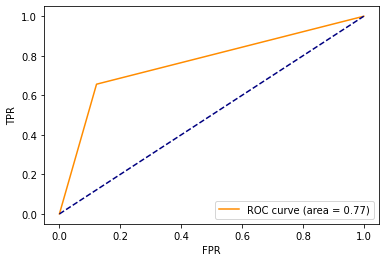

Confusion matrix:
 [[138  26]
 [ 27   5]] 

Area under curve = 0.7671493902439025


Algorithm name  Accuracy f1 score test  CV score  F1-CV score diff  \
0  Logistic regression                0.841837  0.773445          0.068391   

   Area under curve  
0          0.767149

In [279]:
#ROC curve and the AUC value
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(ypr, yt)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr,color='darkorange', label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1],linestyle='--',color='navy')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.show()
print("Confusion matrix:\n",confusion_matrix(ypr,predyt),'\n')
print('Area under curve =',roc_auc)

#Saving the results of model
model_result = pd.DataFrame(columns=['Algorithm name','Accuracy f1 score test' ,'CV score','F1-CV score diff',"Area under curve"])
model_result.loc[len(model_result.index)] = ['Logistic regression', acc, cvs, least_diff,roc_auc] 
model_result

In [280]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 100.00%
Accuracy score of test is : 82.14% 

Classification report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       155
           1       0.57      0.63      0.60        41

    accuracy                           0.82       196
   macro avg       0.73      0.75      0.74       196
weighted avg       0.83      0.82      0.83       196



In [281]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.8214285714285714
CV score at 2 = 0.7755102040816326
CV score at 3 = 0.7847069786057798
CV score at 4 = 0.7714285714285715
CV score at 5 = 0.7795918367346939
CV score at 6 = 0.7612848521123249
CV score at 7 = 0.7928571428571428
CV score at 8 = 0.8041533386645342
CV score at 9 = 0.7837429682485748
CV score at 10 = 0.7836734693877551

Least difference of CV score and F1 score of testing is : 0.017275232764037196


In [282]:
# Hyper parameter tuning for decision tree model
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':["gini", "entropy"],
              'splitter':["best", "random"],
              'max_depth':[6,10,15,20],
              'max_features':["auto", "sqrt", "log2"]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features='auto')


In [286]:
#Training model as per best parameters
model = DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features='auto')
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 84.82%
Accuracy score of test is : 85.20% 

Classification report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       155
           1       0.71      0.49      0.58        41

    accuracy                           0.85       196
   macro avg       0.79      0.72      0.74       196
weighted avg       0.84      0.85      0.84       196



In [287]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.8520408163265306
CV score at 2 = 0.7571428571428571
CV score at 3 = 0.7541103043720255
CV score at 4 = 0.7520408163265306
CV score at 5 = 0.7438775510204081
CV score at 6 = 0.7684485510499277
CV score at 7 = 0.7714285714285714
CV score at 8 = 0.7724243635878982
CV score at 9 = 0.75
CV score at 10 = 0.7877551020408162

Least difference of CV score and F1 score of testing is : 0.06428571428571439


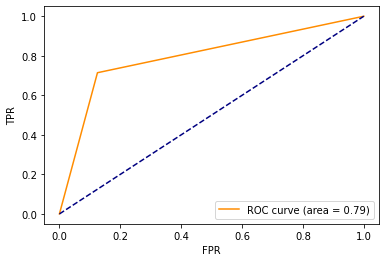

Confusion matrix:
 [[147   8]
 [ 21  20]] 

Area under curve = 0.7946428571428571


Algorithm name  Accuracy f1 score test  CV score  \
0       Logistic regression                0.841837  0.773445   
1  Decision tree classifier                0.852041  0.787755   

   F1-CV score diff  Area under curve  
0          0.068391          0.767149  
1          0.064286          0.794643

In [288]:
#ROC curve and the AUC value
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(ypr, yt)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr,color='darkorange', label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1],linestyle='--',color='navy')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.show()
print("Confusion matrix:\n",confusion_matrix(yt,ypr),'\n')
print('Area under curve =',roc_auc)

#Saving the results of model
model_result.loc[len(model_result.index)] = ['Decision tree classifier', acc, cvs, abs(least_diff), roc_auc] 
model_result

In [289]:
#K nearest neighbors classifier
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 79.21%
Accuracy score of test is : 74.49% 

Classification report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       155
           1       0.30      0.17      0.22        41

    accuracy                           0.74       196
   macro avg       0.55      0.53      0.53       196
weighted avg       0.70      0.74      0.72       196



In [290]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.7448979591836735
CV score at 2 = 0.7510204081632653
CV score at 3 = 0.7449203579670175
CV score at 4 = 0.7571428571428571
CV score at 5 = 0.7459183673469388
CV score at 6 = 0.7428737094119408
CV score at 7 = 0.7418367346938775
CV score at 8 = 0.7419115687058511
CV score at 9 = 0.7398535130441348
CV score at 10 = 0.7459183673469388

Least difference of CV score and F1 score of testing is : -0.012244897959183598


In [291]:
# Hyper parameter tuning for KNN model
from sklearn.model_selection import GridSearchCV
parameters = { 'n_neighbors':range(4,11), 
              'weights':['uniform','distance'], 
              'algorithm' :['auto', 'ball_tree', 'kd_tree', 'brute'], 
              'leaf_size':[5,6,8,10]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

KNeighborsClassifier(leaf_size=5, n_neighbors=8)


In [292]:
#Training model as per best parameters
model = KNeighborsClassifier(leaf_size=5, n_neighbors=8)
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 75.77%
Accuracy score of test is : 79.59% 

Classification report:
              precision    recall  f1-score   support

           0       0.80      0.98      0.88       155
           1       0.57      0.10      0.17        41

    accuracy                           0.80       196
   macro avg       0.69      0.54      0.53       196
weighted avg       0.76      0.80      0.73       196



In [293]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.7959183673469388
CV score at 2 = 0.7459183673469387
CV score at 3 = 0.7510240583353659
CV score at 4 = 0.7520408163265306
CV score at 5 = 0.7551020408163265
CV score at 6 = 0.7541024489999502
CV score at 7 = 0.7551020408163265
CV score at 8 = 0.7500249900039984
CV score at 9 = 0.7571355759429154
CV score at 10 = 0.7520408163265306

Least difference of CV score and F1 score of testing is : 0.03878279140402341


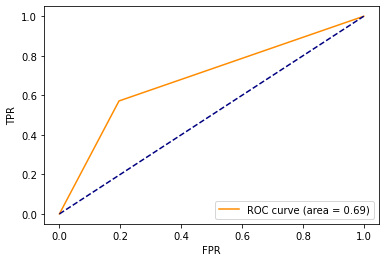

Confusion matrix:
 [[152   3]
 [ 37   4]] 

Area under curve = 0.6878306878306878


Algorithm name  Accuracy f1 score test  CV score  \
0       Logistic regression                0.841837  0.773445   
1  Decision tree classifier                0.852041  0.787755   
2            KNN classifier                0.795918  0.757136   

   F1-CV score diff  Area under curve  
0          0.068391          0.767149  
1          0.064286          0.794643  
2          0.038783          0.687831

In [294]:
#ROC curve and the AUC value
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(ypr, yt)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr,color='darkorange', label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1],linestyle='--',color='navy')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.show()
print("Confusion matrix:\n",confusion_matrix(yt,ypr),'\n')
print('Area under curve =',roc_auc)

#Saving the results of model
model_result.loc[len(model_result.index)] = ['KNN classifier', acc, cvs, abs(least_diff), roc_auc] 
model_result

In [296]:
# Gradient boosting regressor
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 96.94%
Accuracy score of test is : 87.76% 

Classification report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       155
           1       0.70      0.73      0.71        41

    accuracy                           0.88       196
   macro avg       0.81      0.82      0.82       196
weighted avg       0.88      0.88      0.88       196



In [297]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.8775510204081632
CV score at 2 = 0.810204081632653
CV score at 3 = 0.8184117871459572
CV score at 4 = 0.8265306122448979
CV score at 5 = 0.826530612244898
CV score at 6 = 0.822491146690608
CV score at 7 = 0.8275510204081632
CV score at 8 = 0.8256030920964947
CV score at 9 = 0.8296050892890852
CV score at 10 = 0.8326530612244898

Least difference of CV score and F1 score of testing is : 0.04489795918367345


In [307]:
# Hyper parameter tuning for gradient boost model
from sklearn.model_selection import GridSearchCV
parameters = { 'criterion':['friedman_mse', 'squared_error', 'mse', 'mae'], 
              'n_estimators':[80,90,110,150], 
              'learning_rate' :[0.01, 0.1,1], 
              'loss':['deviance', 'exponential']}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

GradientBoostingClassifier(criterion='mse', loss='exponential')


In [308]:
#Training model as per best parameters
model = GradientBoostingClassifier(loss='exponential', criterion='mse')
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 95.15%
Accuracy score of test is : 89.80% 

Classification report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       155
           1       0.74      0.78      0.76        41

    accuracy                           0.90       196
   macro avg       0.84      0.85      0.85       196
weighted avg       0.90      0.90      0.90       196



In [309]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.8979591836734694
CV score at 2 = 0.8163265306122449
CV score at 3 = 0.8112511960375978
CV score at 4 = 0.8183673469387754
CV score at 5 = 0.8224489795918368
CV score at 6 = 0.8225036161404559
CV score at 7 = 0.8163265306122448
CV score at 8 = 0.8296681327469013
CV score at 9 = 0.8286045984822743
CV score at 10 = 0.8316326530612246

Least difference of CV score and F1 score of testing is : 0.0663265306122448


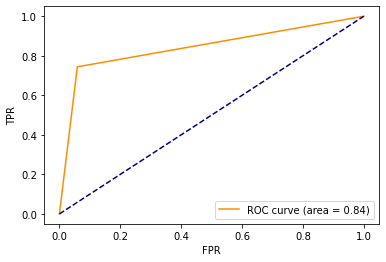

Confusion matrix:
 [[144  11]
 [  9  32]] 

Area under curve = 0.8426812585499316


Algorithm name  Accuracy f1 score test  CV score  \
0        Logistic regression                0.841837  0.773445   
1   Decision tree classifier                0.852041  0.787755   
2             KNN classifier                0.795918  0.757136   
3  Gradient boost classifier                0.897959  0.831633   

   F1-CV score diff  Area under curve  
0          0.068391          0.767149  
1          0.064286          0.794643  
2          0.038783          0.687831  
3          0.066327          0.842681

In [310]:
#ROC curve and the AUC value
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(ypr, yt)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr,color='darkorange', label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1],linestyle='--',color='navy')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.show()
print("Confusion matrix:\n",confusion_matrix(yt,ypr),'\n')
print('Area under curve =',roc_auc)

#Saving the results of model
model_result.loc[len(model_result.index)] = ['Gradient boost classifier', acc, cvs, abs(least_diff), roc_auc] 
model_result

In [314]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 100.00%
Accuracy score of test is : 84.69% 

Classification report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       155
           1       0.66      0.56      0.61        41

    accuracy                           0.85       196
   macro avg       0.77      0.74      0.76       196
weighted avg       0.84      0.85      0.84       196



In [315]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.8469387755102041
CV score at 2 = 0.7826530612244897
CV score at 3 = 0.7786032782374314
CV score at 4 = 0.7969387755102041
CV score at 5 = 0.7795918367346939
CV score at 6 = 0.7959374532395631
CV score at 7 = 0.7928571428571428
CV score at 8 = 0.7969228975076635
CV score at 9 = 0.7745309019519009
CV score at 10 = 0.7918367346938775

Least difference of CV score and F1 score of testing is : 0.050000000000000044


In [376]:
# Hyper parameter tuning for random forest model
from sklearn.model_selection import GridSearchCV
parameters = { 'n_estimators':[80,90,100,150], 
              'criterion':["entropy",'gini'], 
              'max_depth' :[4, 8, 14, 16, 20], 
              'max_features':["auto", "sqrt", "log2"]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

RandomForestClassifier(max_depth=16, max_features='sqrt')


In [378]:
#Training model as per best parameters
model = RandomForestClassifier(max_depth=16, max_features='sqrt')
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 100.00%
Accuracy score of test is : 86.22% 

Classification report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       155
           1       0.68      0.66      0.67        41

    accuracy                           0.86       196
   macro avg       0.79      0.79      0.79       196
weighted avg       0.86      0.86      0.86       196



In [380]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.8622448979591837
CV score at 2 = 0.7806122448979591
CV score at 3 = 0.787765082581315
CV score at 4 = 0.7806122448979591
CV score at 5 = 0.7928571428571428
CV score at 6 = 0.7877574941393585
CV score at 7 = 0.7999999999999999
CV score at 8 = 0.7908336665333866
CV score at 9 = 0.7806471099029714
CV score at 10 = 0.7887755102040817

Least difference of CV score and F1 score of testing is : 0.062244897959183754


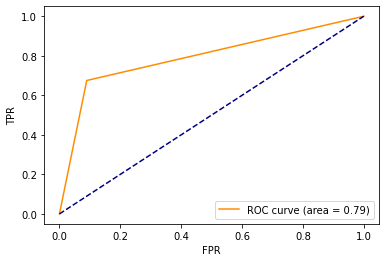

Confusion matrix:
 [[142  13]
 [ 14  27]] 

Area under curve = 0.7926282051282051


Algorithm name  Accuracy f1 score test  CV score  \
0        Logistic regression                0.841837  0.773445   
1   Decision tree classifier                0.852041  0.787755   
2             KNN classifier                0.795918  0.757136   
3  Gradient boost classifier                0.897959  0.831633   
4   Random forest classifier                0.862245  0.800000   

   F1-CV score diff  Area under curve  
0          0.068391          0.767149  
1          0.064286          0.794643  
2          0.038783          0.687831  
3          0.066327          0.842681  
4          0.062245          0.792628

In [381]:
#ROC curve and the AUC value
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(ypr, yt)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr,color='darkorange', label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1],linestyle='--',color='navy')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.show()
print("Confusion matrix:\n",confusion_matrix(yt,ypr),'\n')
print('Area under curve =',roc_auc)

#Saving the results of model
model_result.loc[len(model_result.index)] = ['Random forest classifier', acc, cvs, abs(least_diff), roc_auc] 
model_result

By considering max F1 test score, least difference between F1-CV score and max area covered AUC value

GB classifier found best model

In [382]:
#Prediction using selected best model
model = GradientBoostingClassifier(loss='exponential', criterion='mse')
model.fit(xtr,ytr)
predyt = model.predict(xt)

In [443]:
table = pd.DataFrame()
table['Actual fraud report'] = ['No' if i==0 else 'Yes' for i in yt]
table['Predicted fraud report'] = ['No' if i==0 else 'Yes' for i in predyt]
table.sample(5)

Actual fraud report Predicted fraud report
46                   No                     No
189                  No                     No
87                  Yes                    Yes
183                  No                     No
70                  Yes                    Yes

In [444]:
#Saving the model
import pickle
filename='insurance.pkl'
pickle.dump(model,open(filename,'wb'))